<a href="https://colab.research.google.com/github/euguroglu/Machine-Learning-Projects/blob/master/Random_Forest_Kyphosis_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Data Preperation and Visualization

In [4]:
df = pd.read_csv('kyphosis.csv')

In [5]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


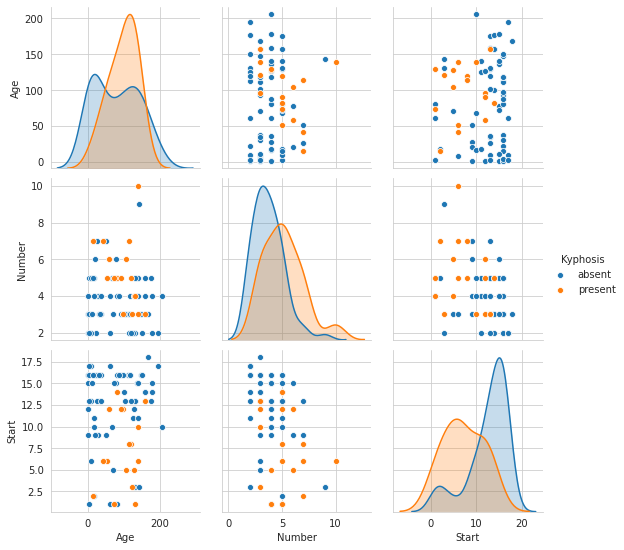

In [8]:
sns.set_style('whitegrid')
sns.pairplot(df,hue='Kyphosis')

In [9]:
X = df.drop('Kyphosis',axis=1)

In [10]:
y = df['Kyphosis']

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

## Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
dtree = DecisionTreeClassifier()

In [19]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Prediction

In [22]:
y_pred_train = dtree.predict(X_train)

In [21]:
y_pred = dtree.predict(X_test)

## Evaluation

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
print(confusion_matrix(y_train,y_pred_train))
print('\n')
print(classification_report(y_train,y_pred_train))

[[47  0]
 [ 0  9]]


              precision    recall  f1-score   support

      absent       1.00      1.00      1.00        47
     present       1.00      1.00      1.00         9

    accuracy                           1.00        56
   macro avg       1.00      1.00      1.00        56
weighted avg       1.00      1.00      1.00        56



In [24]:
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[16  1]
 [ 5  3]]


              precision    recall  f1-score   support

      absent       0.76      0.94      0.84        17
     present       0.75      0.38      0.50         8

    accuracy                           0.76        25
   macro avg       0.76      0.66      0.67        25
weighted avg       0.76      0.76      0.73        25



## Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rfc = RandomForestClassifier(n_estimators=200)

In [28]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Prediction

In [29]:
y_pred_2 = rfc.predict(X_test)

## Evaluation

In [30]:
print(confusion_matrix(y_test,y_pred_2))
print('\n')
print(classification_report(y_test,y_pred_2))

[[17  0]
 [ 7  1]]


              precision    recall  f1-score   support

      absent       0.71      1.00      0.83        17
     present       1.00      0.12      0.22         8

    accuracy                           0.72        25
   macro avg       0.85      0.56      0.53        25
weighted avg       0.80      0.72      0.64        25

